In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('questions.csv')

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data.shape

(404351, 6)

In [5]:
data = data.dropna()

In [6]:
data.shape

(404348, 6)

In [7]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


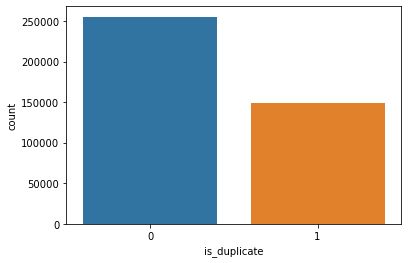

In [8]:
sns.countplot(data['is_duplicate'])
plt.show()

In [12]:
data = data.sample(frac=1, random_state=11).reset_index(drop=True)

In [13]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,79416,157763,157764,What are the movies that made you cry?,What movies made you cry?,1
1,393714,769447,769448,I have a crush on my best friend. I was trying...,I was talking to a woman on a dating website a...,0
2,381743,746561,746562,Are social networking sites turning many of us...,Have social networking sites made people more ...,1
3,207898,410123,410124,Is btech-mtech dual degree recognized outside ...,Being really interested in programming and cod...,0
4,176605,348886,348887,How can I increase my son's appetite?,How can we increase appetite?,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:

X, X_valid, y, y_valid = train_test_split(data[['question1', 'question2']], data['is_duplicate'],
                                                    test_size=0.05, 
                                                    stratify=data['is_duplicate'].values, random_state=32)

In [16]:
X.shape, X_valid.shape, y.shape, y_valid.shape

((384130, 2), (20218, 2), (384130,), (20218,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.053, 
                                                    stratify=y.values, random_state=32)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((363771, 2), (20359, 2), (363771,), (20359,))

In [19]:
del(data)
del(X)
del(y)

In [20]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((363771, 2), (20218, 2), (20359, 2), (363771,), (20218,), (20359,))

In [21]:
X_train.reset_index(inplace = True, drop = True)
X_valid.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop=True)
y_valid.reset_index(inplace = True, drop=True)
y_test.reset_index(inplace = True, drop=True)

In [22]:
y_train

0         0
1         1
2         1
3         0
4         0
         ..
363766    1
363767    1
363768    1
363769    1
363770    0
Name: is_duplicate, Length: 363771, dtype: int64

In [23]:
X_train

,question1,question2
0,"Is a wound that is itching, a sign of the woun...",Good website for preparing UGC net exam for co...
1,What if my girlfriend still talks to her ex?,What if my girlfriend talks to her ex?
2,What were angels actually described to look li...,How do angels really look according to the Bible?
3,"How do I get a mortgage in Vietnam, if I am a ...",I am a foreign cloud-based digital SaaS provid...
4,How can I perform a recovery in my Asus desktop?,What is the best way to lease a car to a friend?
...,...,...
363766,Where is the Xiaomi Service Centers in Bangalore?,Where is the Xiaomi service center in Bangalore?
363767,What are some good and bad benefits of banning...,What are the benefits of banning 500 and 1000 ...
363768,Where can I get wonderful floor tiles company ...,Where can I found wide variety of ceramic tile...
363769,How can I become a millionaire before the age ...,How do I become a millionaire now?


In [25]:
X_train['question2'][1]

'What if my girlfriend talks to her ex?'

In [26]:
from collections import defaultdict
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bapan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
vocab = defaultdict(lambda: 0)
vocab['<PAD>'] = 1

Q1_train, Q2_train = [], []
for i in range(len(X_train)):
    
    v = nltk.word_tokenize(X_train['question1'][i])
    w = nltk.word_tokenize(X_train['question2'][i])
    q = v + w
    Q1_train.append(v)
    Q2_train.append(w)
  
    for word in q:
        
        if word not in vocab:
            vocab[word] = len(vocab) + 1
print('The length of the vocabulary is: ', len(vocab))

The length of the vocabulary is:  129645


In [28]:
print(Q1_train[1], Q2_train[1])

['What', 'if', 'my', 'girlfriend', 'still', 'talks', 'to', 'her', 'ex', '?'] ['What', 'if', 'my', 'girlfriend', 'talks', 'to', 'her', 'ex', '?']


In [29]:
print(vocab['<PAD>'])
print(vocab['Astrology'])
print(vocab['Astronomy'])
print(vocab['Bangalore'])

1
9332
20571
1207


In [30]:
Q1_valid, Q2_valid = [], []
for i in range(len(X_valid)):
    
    Q1_valid.append(nltk.word_tokenize(X_valid['question1'][i]))
    Q2_valid.append(nltk.word_tokenize(X_valid['question2'][i]))

In [31]:
len(Q1_valid), len(Q2_valid)

(20218, 20218)

In [32]:
print(Q1_valid[0])

['What', 'is', 'the', 'meaning', 'and', 'purpose', 'to', 'life', '?']


In [33]:
Q1_test, Q2_test = [], []
for i in range(len(X_test)):
    
    Q1_test.append(nltk.word_tokenize(X_test['question1'][i]))
    Q2_test.append(nltk.word_tokenize(X_test['question2'][i]))

In [34]:
len(Q1_test), len(Q2_test)

(20359, 20359)

In [35]:
# Converting questions to array of integers
for i in range(len(Q1_train)):
    Q1_train[i] = [vocab[word] for word in Q1_train[i]]
    Q2_train[i] = [vocab[word] for word in Q2_train[i]]
    
for i in range(len(Q1_valid)):
    Q1_valid[i] = [vocab[word] for word in Q1_valid[i]]
    Q2_valid[i] = [vocab[word] for word in Q2_valid[i]]

        
for i in range(len(Q1_test)):
    Q1_test[i] = [vocab[word] for word in Q1_test[i]]
    Q2_test[i] = [vocab[word] for word in Q2_test[i]]

In [36]:
maxlen = -10000
for arr in Q1_train:
    if len(arr) > maxlen:
        maxlen = len(arr)
print(maxlen)

144


In [37]:
c = 0
maxlen = -10000
for arr in Q2_train:
    if len(arr) > maxlen or len(arr) > 270:
        maxlen = len(arr)
        c = c+1
print(maxlen)
print(c)

272
19


In [38]:
def Convert(Q1, Q2, label, pad = vocab['<PAD>']):
    
    max_len = 272
    Q1_batch, Q2_batch = [], []
    
    for q1, q2 in zip(Q1, Q2):
        
        q1 = q1 + [pad] * (max_len - len(q1))
        q2 = q2 + [pad] * (max_len - len(q2))
        
        Q1_batch.append(q1)
        Q2_batch.append(q2)
        
    Q1_batch = np.array(Q1_batch).astype(np.float32)
    Q2_batch = np.array(Q2_batch).astype(np.float32)
    y_batch = label.values.astype(np.float32)
    
    return Q1_batch, Q2_batch, y_batch

In [39]:
Q1_train_, Q2_train_, y_train_ = Convert(Q1_train, Q2_train, y_train, pad = vocab['<PAD>'])
Q1_valid_, Q2_valid_, y_valid_ = Convert(Q1_valid, Q2_valid, y_valid, pad = vocab['<PAD>'])
Q1_test_, Q2_test_, y_test_ = Convert(Q1_test, Q2_test, y_test, pad = vocab['<PAD>'])

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import backend as K

In [44]:
embed_dim = 256
vocab_size = len(vocab)
maxlen = 272
def initialize_base_network():
    input = Input(shape=(maxlen, ))
    x = Embedding(vocab_size, embed_dim,
                  input_length = maxlen)(input)
    
    x = LSTM(128)(x)
    return Model(inputs=input, outputs=x)


In [45]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = tf.math.reduce_sum(tf.square(x - y), axis=1, keepdims=True)
    return tf.sqrt(tf.maximum(sum_square, tf.keras.backend.epsilon()))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [47]:
base_network = initialize_base_network()

# create the left input and point to the base network
input_a = Input(shape=(maxlen,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(maxlen,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)


In [48]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 left_input (InputLayer)        [(None, 272)]        0           []                               
                                                                                                  
 right_input (InputLayer)       [(None, 272)]        0           []                               
                                                                                                  
 model (Functional)             (None, 128)          35242240    ['left_input[0][0]',             
                                                                  'right_input[0][0]']            
                                                                                                  
 output_layer (Lambda)          (None, 1)            0           ['model[0][0]',            

In [49]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [50]:
adm = Adam(learning_rate = 0.001)
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=adm)

In [51]:

history = model.fit([Q1_train_, Q2_train_], y_train_, epochs=2, batch_size=128, 
                    validation_data=([Q1_valid_, Q2_valid_], y_valid_))

Epoch 1/2
2842/2842 [==============================] - 9379s 3s/step - loss: 0.6303 - val_loss: 0.6303
Epoch 2/2
2842/2842 [==============================] - 8688s 3s/step - loss: 0.6303 - val_loss: 0.6303
